## Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pip install pmdarima

In [25]:
from pmdarima import auto_arima
# Ignore harmless warnings
import statsmodels as sm
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
df= pd.read_excel('cleaned_Travelpac_removed_outliers.xlsx')

In [5]:
df.head()

,Age,Duration_of_Visit,Holiday_Package,Sex,Year,country,mode,purpose,quarter,where_contact_lives,visits,nights,Amount_Spent
0,0-15,4-13 nights,Independent,Male,2009,Austria,Air,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.103402e+06
1,0-15,4-13 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,1600.680374,11204.762616,1.125278e+06
2,16-24,4-13 nights,Independent,Male,2009,Austria,Air,Holiday,Jan-Mar,UK residents,3064.743058,20873.377956,1.622982e+06
3,16-24,4-13 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,2702.755561,12411.702616,1.164191e+06
4,16-24,14-27 nights,Independent,Female,2009,Austria,Air,Holiday,Jan-Mar,UK residents,525.351507,7354.921102,7.633357e+05


In [6]:
## Total number of visits per year

total_visits_perYear = df.groupby("Year").agg({"visits":pd.Series.sum})


year = {'2009' : total_visits_perYear['visits'].iat[0] , '2010':total_visits_perYear['visits'].iat[1] , '2011':total_visits_perYear['visits'].iat[2] ,'2012':total_visits_perYear['visits'].iat[3] , '2013':total_visits_perYear['visits'].iat[4] ,'2014' : total_visits_perYear['visits'].iat[5] , '2015':total_visits_perYear['visits'].iat[6] , '2016':total_visits_perYear['visits'].iat[7] , '2017':total_visits_perYear['visits'].iat[8]
       ,'2018' : total_visits_perYear['visits'].iat[9] , '2019':total_visits_perYear['visits'].iat[10] , '2020':total_visits_perYear['visits'].iat[11] ,'2021':total_visits_perYear['visits'].iat[12]}

total_visits_perYear.head()


,visits
Year,
2009,5.377005e+07
2010,5.456793e+07
2011,5.570144e+07
2012,5.617218e+07
2013,5.728326e+07


In [7]:
#total number of nights per years
total_nights_perYear = df.groupby("Year").agg({"nights":pd.Series.sum})


#total expend per year
total_expend_perYear = df.groupby("Year").agg({"Amount_Spent":pd.Series.sum})

In [8]:

df_total_visits_perYear = pd.DataFrame(total_visits_perYear)
year = ['2009-01-01','2010-01-01','2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01']
df_total_visits_perYear['year'] = year


df_total_nights_perYear = pd.DataFrame(total_nights_perYear)
df_total_nights_perYear['year'] = year

df_total_expend_perYear = pd.DataFrame(total_expend_perYear)
df_total_expend_perYear['year'] = year

In [9]:
df_total_visits_perYear = pd.DataFrame(total_visits_perYear)
df_total_visits_perYear.set_index('year', inplace=True)
df_total_visits_perYear.head()

,visits
year,
2009-01-01,5.377005e+07
2010-01-01,5.456793e+07
2011-01-01,5.570144e+07
2012-01-01,5.617218e+07
2013-01-01,5.728326e+07


In [10]:
df_total_nights_perYear = pd.DataFrame(total_nights_perYear)
df_total_nights_perYear.set_index('year', inplace=True)
df_total_nights_perYear.head()

,nights
year,
2009-01-01,4.953307e+08
2010-01-01,5.076900e+08
2011-01-01,5.055550e+08
2012-01-01,4.986807e+08
2013-01-01,5.059272e+08


In [14]:
df_total_expend_perYear = pd.DataFrame(total_expend_perYear)
df_total_expend_perYear.set_index('year', inplace=True)
df_total_expend_perYear.head()

,Amount_Spent
year,
2009-01-01,2.882566e+10
2010-01-01,3.003222e+10
2011-01-01,3.051717e+10
2012-01-01,3.144172e+10
2013-01-01,3.320526e+10


##### Adfuller test

Augmented Dickey–Fuller Test
The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not. Similar to a t-test, 
we set a significance level before the test and make conclusions on the hypothesis based on the resulting p-value.

Null Hypothesis: The data is not stationary.
Alternative Hypothesis: The data is stationary.

For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

- p-value <= significance level (0.05)
- If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

In [15]:
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

#### ADfuller test for total visits per year

In [16]:
adf_test(df_total_visits_perYear['visits'])

1. ADF :  -2.4712661605700355
2. P-Value :  0.12262300887141708
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 8
5. Critical Values :
	 1% :  -4.6651863281249994
	 5% :  -3.3671868750000002
	 10% :  -2.802960625


- The p value is greater than 0.05. so, The data is not stationary.
- auto_arima will be used to suggest a suitable p,d,q value of the arima model

### Model fitting for Total visits per year

In [17]:
model = auto_arima(df_total_visits_perYear['visits'], start_p=1, start_q=1,
                   test='adf',
                   max_p=3, max_q=3, m=1,
                   start_P=0, seasonal=False,
                   d=None, D=1, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=403.232, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=404.290, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=406.551, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=400.983, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=402.455, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=413.217, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=400.200, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=401.723, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=411.181, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=403.753, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=404.332, Time=0.11 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.042 seconds


In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -198.100
Date:                Sun, 15 Jan 2023   AIC                            400.200
Time:                        10:47:28   BIC                            400.996
Sample:                    01-01-2009   HQIC                           399.698
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6403      0.322     -1.987      0.047      -1.272      -0.009
sigma2      3.417e+14   8.72e-17   3.92e+30      0.000    3.42e+14    3.42e+14
===================================================================================
Ljung-Box (L1) (Q):                   3.62   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.06   Prob(JB):                         0.24
Heteroskedasticity (H):               5.49   Skew:                            -0.83
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.59e+46. Standard errors may be unstable.
"""

In [19]:
predictions = model.predict()

In [20]:
predictions

2022-01-01    6.848761e+06
2023-01-01   -1.945662e+06
2024-01-01   -1.074009e+07
2025-01-01   -1.953451e+07
2026-01-01   -2.832893e+07
2027-01-01   -3.712336e+07
2028-01-01   -4.591778e+07
2029-01-01   -5.471221e+07
2030-01-01   -6.350663e+07
2031-01-01   -7.230105e+07
Freq: AS-JAN, dtype: float64

- The prediction result shows that the model fit is not good, as it is not possible to have a negative visit. its better to use another type of model other than arima.

### SARIMAX model on Total visits per year

sm.tsa.statespace.SARIMAX is a class in the statsmodels library that fits a seasonal autoregressive integrated moving average (SARIMA) model with exogenous regressors to time series data. A SARIMA model is a type of statistical model that can be used to forecast future values of a time series based on its past values. It includes a seasonal component, which allows the model to take into account periodic fluctuations in the data, as well as an autoregressive component, which allows the model to use the lagged values of the time series as predictors, and a moving average component, which allows the model to smooth out short-term fluctuations in the data. The SARIMAX class can handle both univariate and multivariate time series data, and it allows you to specify the order of the autoregressive (AR) and moving average (MA) components, as well as the order of the seasonal components, if applicable.

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df_total_visits_perYear['visits'],order=(0, 1, 1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

In [55]:
predictions=model_fit.predict()
predictions

2009-01-01    0.000000e+00
2010-01-01    5.377005e+07
2011-01-01    5.456793e+07
2012-01-01    5.570144e+07
2013-01-01    5.617218e+07
2014-01-01    5.728326e+07
2015-01-01    5.790274e+07
2016-01-01    6.150797e+07
2017-01-01    6.146612e+07
2018-01-01    6.033069e+07
2019-01-01    5.538666e+07
2020-01-01    5.437662e+07
2021-01-01    3.807808e+07
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [56]:
df_total_visits_perYear['visits']

year
2009-01-01    5.377005e+07
2010-01-01    5.456793e+07
2011-01-01    5.570144e+07
2012-01-01    5.617218e+07
2013-01-01    5.728326e+07
2014-01-01    5.790274e+07
2015-01-01    6.150797e+07
2016-01-01    6.146612e+07
2017-01-01    6.033069e+07
2018-01-01    5.538666e+07
2019-01-01    5.437662e+07
2020-01-01    1.119304e+07
2021-01-01    1.564319e+07
Name: visits, dtype: float64

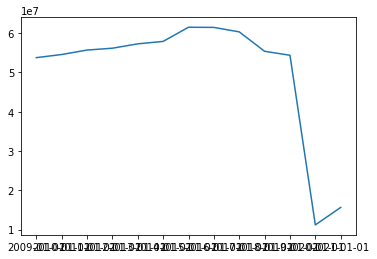

In [57]:
plt.plot(df_total_visits_perYear['visits'])

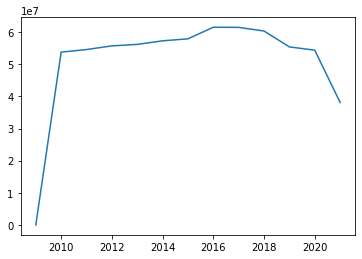

In [58]:
plt.plot(predictions) #for total visits per year

In [59]:
rmse=sqrt(mean_squared_error(predictions,df_total_visits_perYear['visits']))
print(rmse)

20196873.41190835


In [60]:
forecast = model_fit.predict(start=len(df_total_visits_perYear), end=len(df_total_visits_perYear)+5)
forecast

2022-01-01    1.644106e+07
2023-01-01    1.757458e+07
2024-01-01    1.804532e+07
2025-01-01    1.915639e+07
2026-01-01    1.977587e+07
2027-01-01    2.338110e+07
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<AxesSubplot:>

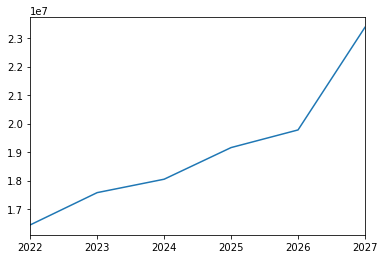

In [61]:
forecast.plot()

## Arima Model for Expenditure

#### ADfuller test for Amount spent per year

In [62]:
adf_test(df_total_expend_perYear['Amount_Spent'])

1. ADF :  -0.5478315984611131
2. P-Value :  0.8823397220442906
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 8
5. Critical Values :
	 1% :  -4.6651863281249994
	 5% :  -3.3671868750000002
	 10% :  -2.802960625


- The data is not stationary

In [63]:
model = auto_arima(df_total_expend_perYear['Amount_Spent'], start_p=1, start_q=1,
                   test='adf',
                   max_p=3, max_q=3, m=1,
                   start_P=0, seasonal=False,
                   d=None, D=1, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=544.235, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=543.905, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=549.828, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=541.921, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=542.080, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=549.751, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=539.398, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=541.437, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=547.733, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=545.408, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.783 seconds


In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -267.699
Date:                Sun, 15 Jan 2023   AIC                            539.398
Time:                        11:01:40   BIC                            540.194
Sample:                    01-01-2009   HQIC                           538.897
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6725      0.277     -2.426      0.015      -1.216      -0.129
sigma2      1.058e+20   6.04e-23   1.75e+42      0.000    1.06e+20    1.06e+20
===================================================================================
Ljung-Box (L1) (Q):                   4.12   Jarque-Bera (JB):                 1.53
Prob(Q):                              0.04   Prob(JB):                         0.47
Heteroskedasticity (H):               5.21   Skew:                            -0.35
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [65]:
predictions = model.predict()
predictions

2022-01-01    7.664571e+09
2023-01-01    4.009605e+09
2024-01-01    3.546402e+08
2025-01-01   -3.300325e+09
2026-01-01   -6.955290e+09
2027-01-01   -1.061026e+10
2028-01-01   -1.426522e+10
2029-01-01   -1.792019e+10
2030-01-01   -2.157515e+10
2031-01-01   -2.523012e+10
Freq: AS-JAN, dtype: float64

- The prediction result shows that the model fit is not good, as it is not likely to have a negative value for amount spent. its better to use another type of model other than arima.

### SARIMAX model on Amount spent per year

In [66]:
model=SARIMAX(df_total_expend_perYear['Amount_Spent'],order=(0, 1, 1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

In [67]:
predictions=model_fit.predict()
predictions

2009-01-01    0.000000e+00
2010-01-01    2.882566e+10
2011-01-01    3.003222e+10
2012-01-01    3.051717e+10
2013-01-01    3.144172e+10
2014-01-01    3.320526e+10
2015-01-01    3.243713e+10
2016-01-01    3.411700e+10
2017-01-01    3.388735e+10
2018-01-01    3.311297e+10
2019-01-01    2.977731e+10
2020-01-01    2.905769e+10
2021-01-01    2.041351e+10
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [68]:
rmse=sqrt(mean_squared_error(predictions,df_total_expend_perYear['Amount_Spent']))
print(rmse)

10621495068.138538


#### Amount Spent Forcast Result

In [69]:
forecast = model_fit.predict(start=len(df_total_expend_perYear), end=len(df_total_expend_perYear)+5)
forecast

2022-01-01    1.252610e+10
2023-01-01    1.301104e+10
2024-01-01    1.393559e+10
2025-01-01    1.569914e+10
2026-01-01    1.493100e+10
2027-01-01    1.661088e+10
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<AxesSubplot:>

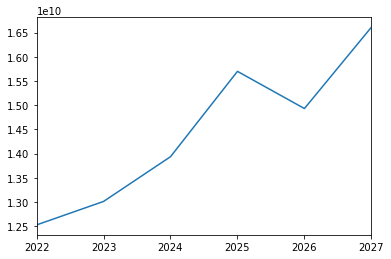

In [70]:
forecast.plot()

## Arima Model For Total Night Spent

In [71]:
adf_test(df_total_nights_perYear['nights'])

1. ADF :  -1.4737376964549154
2. P-Value :  0.5464606266688258
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 8
5. Critical Values :
	 1% :  -4.6651863281249994
	 5% :  -3.3671868750000002
	 10% :  -2.802960625


In [72]:
model = auto_arima(df_total_nights_perYear['nights'], start_p=1, start_q=1,
                   test='adf',
                   max_p=3, max_q=3, m=1,
                   start_P=0, seasonal=False,
                   d=None, D=1, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=458.455, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=450.785, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=468.999, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=450.291, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=448.997, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.329 seconds


In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -223.499
Date:                Sun, 15 Jan 2023   AIC                            448.997
Time:                        11:03:22   BIC                            449.395
Sample:                    01-01-2009   HQIC                           448.746
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.171e+16   4.92e+15      4.408      0.000    1.21e+16    3.14e+16
===================================================================================
Ljung-Box (L1) (Q):                   3.33   Jarque-Bera (JB):                 6.04
Prob(Q):                              0.07   Prob(JB):                         0.05
Heteroskedasticity (H):             314.04   Skew:                             1.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
predictions = model.predict()
predictions

2022-01-01    3.458432e+08
2023-01-01    4.765225e+08
2024-01-01    6.072019e+08
2025-01-01    7.378812e+08
2026-01-01    8.685606e+08
2027-01-01    9.992399e+08
2028-01-01    1.129919e+09
2029-01-01    1.260599e+09
2030-01-01    1.391278e+09
2031-01-01    1.521957e+09
Freq: AS-JAN, dtype: float64

### SARIMAX model on Total nights per year

In [77]:
model=SARIMAX(df_total_nights_perYear['nights'],order=(0, 1, 0),seasonal_order=(1,1,1,12))
model_fit=model.fit()

In [78]:
predictions=model_fit.predict()
predictions

2009-01-01    0.000000e+00
2010-01-01    4.953307e+08
2011-01-01    5.076900e+08
2012-01-01    5.055550e+08
2013-01-01    4.986807e+08
2014-01-01    5.059272e+08
2015-01-01    4.920729e+08
2016-01-01    5.310055e+08
2017-01-01    5.184431e+08
2018-01-01    4.856759e+08
2019-01-01    4.199539e+08
2020-01-01    3.933410e+08
2021-01-01    3.321500e+08
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [79]:
rmse=sqrt(mean_squared_error(predictions,df_total_nights_perYear['nights']))
print(rmse)

167022469.2867775


#### Amount Total nights Forcast Result

In [80]:
forecast = model_fit.predict(start=len(df_total_nights_perYear), end=len(df_total_nights_perYear)+5)
forecast

2022-01-01    2.275231e+08
2023-01-01    2.253881e+08
2024-01-01    2.185138e+08
2025-01-01    2.257603e+08
2026-01-01    2.119060e+08
2027-01-01    2.508386e+08
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<AxesSubplot:>

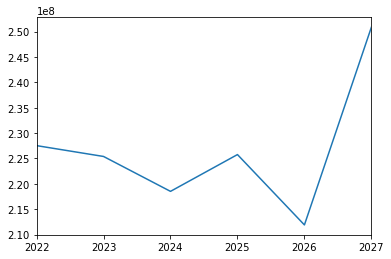

In [81]:
forecast.plot()